### Importing necessory packages for data cleaning and analysis

In [359]:
import sys
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset with pandas library

In [360]:
data =pd.read_csv("internshala_full.csv")
pd.set_option("display.max_rows", None)

In [361]:
data.head(3)

,title,company,location,duration,stipend,hiring_since,oppor_posted,perks,skills,openings
0,Human Resources (HR),Jobs Flash Consulting Services,Gurgaon,4 Months,"7,000 /month",Hiring since September 2021,13 opportunities posted,"Certificate,Letter of recommendation,Informal ...","English Proficiency (Spoken),English Proficien...",1
1,Digital Marketing,Rigil Biotech Private Limited,Delhi,6 Months,"10,000-12,000 /month",Hiring since May 2021,13 opportunities posted,"Certificate,Letter of recommendation,Flexible ...","Amazon Web Services (AWS),Digital Marketing,So...",1
2,Internshala Student Partner,Internshala,Work From Home,6 Weeks,NaN,Hiring since August 2022,2 opportunities posted,"Certificate,Letter of recommendation",NaN,1000


# Data cleaning process

### Finding the duplicates in data and removing 

In [362]:
# Number of duplicate rows present in the data set 
data.duplicated().sum()

74

In [363]:
# Dropping all the duplicate rows 
data.drop_duplicates(inplace=True)

### Finding and handling  null & missing values in data  

In [364]:
# Finding if there are any null values in the dataset
data.isna().sum()

title             0
company           0
location          0
duration          0
stipend           2
hiring_since      0
oppor_posted      0
perks           186
skills          616
openings          0
dtype: int64

In [365]:
# Dropping the rows in which stipend column contains null values
data.dropna(subset=['stipend'],inplace=True)

### Finding if there are any indefinite values

In [366]:
data.stipend.isin(['-np.inf']).sum()

0

In [367]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3924 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         3924 non-null   object
 1   company       3924 non-null   object
 2   location      3924 non-null   object
 3   duration      3924 non-null   object
 4   stipend       3924 non-null   object
 5   hiring_since  3924 non-null   object
 6   oppor_posted  3924 non-null   object
 7   perks         3738 non-null   object
 8   skills        3309 non-null   object
 9   openings      3924 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 337.2+ KB


#### Datatypes of all the columns are in object and some of them need to be typecasted further

### Extracting necessary content from string values from columns and Converting the datatypes further

In [368]:
# Extracting the base stipend digit amount from the string values 
raw_stipend = data.stipend.str.extract(r'(\d+,\d+)')

In [369]:
# Converting dataframe stipend column into series using squeeze() function
squeezed_raw_stipend  = raw_stipend.squeeze()
squeezed_raw_stipend1 = squeezed_raw_stipend.str.strip()
squeezed_raw_stipend2 = squeezed_raw_stipend1.str.replace(',','')

# Converting column stipend datatype from object to float
squeezed_raw_stipend3 = squeezed_raw_stipend2.astype(float)
data['stipend_new']= squeezed_raw_stipend3 

In [370]:
data.head(1)

,title,company,location,duration,stipend,hiring_since,oppor_posted,perks,skills,openings,stipend_new
0,Human Resources (HR),Jobs Flash Consulting Services,Gurgaon,4 Months,"7,000 /month",Hiring since September 2021,13 opportunities posted,"Certificate,Letter of recommendation,Informal ...","English Proficiency (Spoken),English Proficien...",1,7000.0


In [371]:
raw_duration = data.duration.str.extract(r'(\d+)')
raw_duration1=raw_duration.squeeze()

# Converting column duration datatype from object to integer
raw_duration2 =raw_duration1.astype(int)
data['duration'] = raw_duration2

In [372]:
data.head(1)

,title,company,location,duration,stipend,hiring_since,oppor_posted,perks,skills,openings,stipend_new
0,Human Resources (HR),Jobs Flash Consulting Services,Gurgaon,4,"7,000 /month",Hiring since September 2021,13 opportunities posted,"Certificate,Letter of recommendation,Informal ...","English Proficiency (Spoken),English Proficien...",1,7000.0


In [373]:
# dataset contains a mismatching value in hiring since column and this row should be removed 
error_mask_in_hiring = data[(data['hiring_since']=='76 opportunities posted')]
error_mask_in_hiring

,title,company,location,duration,stipend,hiring_since,oppor_posted,perks,skills,openings,stipend_new
3583,CA Articleship,Sunil K. Khanna & Company,Faridabad,6,"6,000 /month",76 opportunities posted,14 candidates hired,Certificate,NaN,4,6000.0


In [374]:
# the index number of the error valued row is 3583 and this is removed 
data.drop(index = 3583,inplace=True)

In [375]:
# Replacing the new values of stipend_new with old column stipend
data['stipend']= data['stipend_new']

In [376]:
# Extra column that is created is being dropped 
data.drop(columns=['stipend_new'],inplace=True)

In [377]:
squeezed_raw_hiring  = data['hiring_since'].squeeze()
squeezed_raw_hiring1 = squeezed_raw_hiring.str.replace('Hiring since','')
squeezed_raw_hiring2 = squeezed_raw_hiring1.str.strip()

# Converting the unorganized datetime format to organized format with to_datetime function
raw_hiring_date = pd.to_datetime(squeezed_raw_hiring2,format="%B %Y")
raw_hiring_date.head(1)

0   2021-09-01
Name: hiring_since, dtype: datetime64[ns]

In [378]:
#extracting the year from the obtained series (sqeezed_raw_hiring3) and replacing these series with the hiring_since column
hiring_year = raw_hiring_date.dt.year
data['hiring_since']=hiring_year

In [379]:
squeezed_raw_oppor  = data['oppor_posted'].squeeze()
squeezed_raw_oppor1 = squeezed_raw_oppor.str.replace('opportunit(ies|y) posted','',regex=True)
squeezed_raw_oppor2 = squeezed_raw_oppor1.str.strip()

# Converting column oppor_posted datatype from object to integer
squeezed_raw_oppor3 = squeezed_raw_oppor2.astype(int)
data['oppor_posted']= squeezed_raw_oppor3

In [380]:
# Finding if there are any null values in newly created stipend column
data.stipend.isna().sum()

153

In [381]:
#dropping all the rows in which stipend column has null values
data.dropna(subset= ['stipend'],inplace=True)

### Detection of Outliers with help of IQR approach

In [382]:
Q3  = data['stipend'].quantile(0.75)
Q1 = data['stipend'].quantile(0.25)
IQR = Q3-Q1
IQR,Q3,Q1

(6000.0, 10000.0, 4000.0)

In [383]:
lower_limit =  Q1 - (1.5* IQR)
upper_limit = Q3 + (1.5* IQR)
lower_limit, upper_limit

(-5000.0, 19000.0)

### Detection of Outliers with help of Box plot vizual approach

##### as the lower limit has come to negative value with Interquartile range method,  we just consider boxplot for attaining the outliers (which are minimum in this case)

<AxesSubplot:xlabel='stipend'>

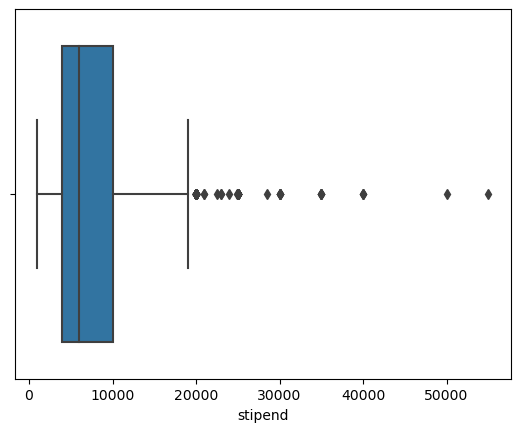

In [384]:
sns.boxplot(x=data['stipend'])

##### here from the diagram we can conclude that the outliers started after values that are greater than 20,000. so we remove the rows that contain the stipend values more than 20,000 for further analysis

In [385]:
# filtering the dataset and forming a new data set by assigning the old dataset name to the new dataset
new_data = data[(data['stipend']<20000)]
data = new_data

### Exporting this data for creating new datasets for seperating comma seperated values in skills & perks columns to multiple rows corresponding to the company column

In [386]:
data.to_csv('C:\\Users\\kumar\\Downloads\\internshala_skills&perks.csv',index=False)

In [387]:
skills_data = pd.read_csv('internshala_skills_data.csv')
skills_data.head(2)

,company,skills
0,Jobs Flash Consulting Services,English Proficiency (Spoken)
1,Jobs Flash Consulting Services,English Proficiency (Written)


In [388]:
perks_data = pd.read_csv('internshala_perks_data.csv')
perks_data.head(2)

,company,perks
0,Jobs Flash Consulting Services,Certificate
1,Jobs Flash Consulting Services,Letter of recommendation


# Descriptive Data Analysis

### Maximum , Minimum and Average values of all the columns

In [389]:
data.describe().loc[['max','min','mean'],::]

,duration,stipend,hiring_since,oppor_posted,openings
max,36.000000,19000.000000,2022.000000,2767.000000,200.000000
min,1.000000,1000.000000,2013.000000,1.000000,1.000000
mean,3.612521,6652.497794,2020.591009,74.153613,4.136238


### Top 10 locations with most no. of companies posting internships

In [390]:
comp_count_by_location = data.groupby(by=['location'],as_index =False).aggregate({'company':'count'})
comp_count_by_location.nlargest(10, 'company')

,location,company
116,Work From Home,1509
27,Delhi,371
73,Mumbai,345
11,Bangalore,200
36,Gurgaon,170
90,Pune,135
81,Noida,122
59,Kolkata,80
1,Ahmedabad,77
41,Hyderabad,77


#### So from the data , most of the internships are "Work from home" based 

### Top 10 locations with highest average stipend offered 

In [391]:
top10_location_data = data.query("location in ['Work From Home','Delhi', 'Mumbai' ,'Bangalore', 'Gurgaon' ,'Pune' ,'Noida', 'Kolkata' ,'Ahmedabad' ,'Hyderabad']")
stp_avg_by_location = top10_location_data.groupby(by= ['location']).aggregate({'stipend':'mean'}).round()
stp_avg_by_location.nlargest(10,'stipend')

,stipend
location,
Gurgaon,9344.0
Bangalore,9052.0
Hyderabad,8312.0
Mumbai,8063.0
Noida,7643.0
Delhi,7530.0
Ahmedabad,7273.0
Pune,7022.0
Kolkata,6079.0


### Average number of internship openings provided in top 10 locations

In [392]:
openings_avg_by_location = top10_location_data.groupby(by= ['location']).aggregate({'openings':'mean'}).round()
openings_avg_by_location.nlargest(10,'openings')

,openings
location,
Hyderabad,5.0
Kolkata,5.0
Work From Home,5.0
Delhi,4.0
Pune,4.0
Ahmedabad,3.0
Bangalore,3.0
Gurgaon,3.0
Mumbai,3.0


### Top 5 companies with most number of internships offered on that particular day

In [393]:
jobs_count_by_company =  data.groupby(by= ['company']).aggregate({'title':'count'})
jobs_count_by_company.nlargest(5,'title')

,title
company,
Buddha Education Association Incorporation,12
Omninos Technologies International Private Limited,12
Across The Globe (ATG),11
Tutedude,11
Rusk Media,10


### Total number of unique skills reqirement posted on internshala 

In [394]:
unique_count_skills = skills_data.skills.unique()
len(unique_count_skills)

327

### Top 10 in demand skills on Internshala 

In [395]:
companies_count_by_skill =  skills_data.groupby(by= ['skills']).aggregate({'company':'count'})
top10_demanding_skills = companies_count_by_skill.nlargest(10,'company')
top10_demanding_skills

,company
skills,
English Proficiency (Written),1397
English Proficiency (Spoken),1350
Social Media Marketing,716
Digital Marketing,714
MS-Excel,663
Creative Writing,535
MS-Office,407
Search Engine Optimization (SEO),403
Email Marketing,382


### Top 10 highest paid skills on internshala

In [396]:
top10_skills_data = data.query("skills in ['English Proficiency (Written)','English Proficiency (Spoken)','Social Media Marketing','Digital Marketing','MS-Excel','Creative Writing','MS-Office','Search Engine Optimization (SEO)','Email Marketing','Adobe Photoshop']")
stp_avg_by_skills = top10_skills_data.groupby(by= ['skills']).aggregate({'stipend':'mean'}).round()
stp_avg_by_skills.nlargest(10,'stipend')

,stipend
skills,
Email Marketing,9000.0
MS-Office,7292.0
MS-Excel,7096.0
English Proficiency (Spoken),6620.0
Adobe Photoshop,5667.0
Search Engine Optimization (SEO),5600.0
English Proficiency (Written),5250.0
Creative Writing,5000.0
Social Media Marketing,4833.0


### Would number of skills affect the stipend amount? (Relationship btw skills and stipend offered)

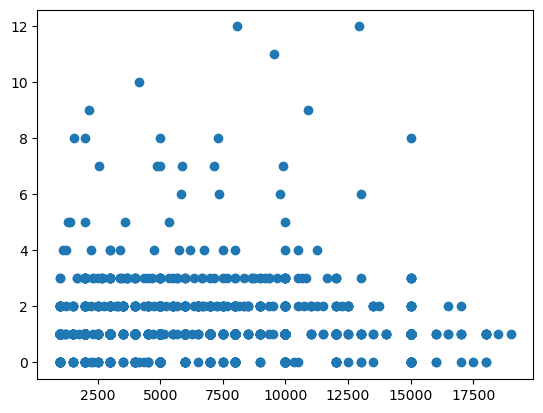

In [397]:

skills_stipend_corr_data = data.groupby(by=['company']).aggregate({'skills':'count','stipend':'mean'})
plt.scatter(skills_stipend_corr_data.stipend,skills_stipend_corr_data.skills)
plt.show()

### All perks offered on Internshala and their frequency

In [398]:
companies_count_by_perk =  perks_data.groupby(by= ['perks']).aggregate({'company':'count'})
top_providing_perks = companies_count_by_perk.nlargest(10,'company')
top_providing_perks

,company
perks,
Certificate,3162
Letter of recommendation,2556
Flexible work hours,1776
5 days a week,1260
Informal dress code,1053
Job offer,845
Free snacks & beverages,450
